In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(r'C:\Anil\Projects\InsuranceFraudDetection-master\code\fraudDetection\data\insuranceFraud.csv')

In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [5]:
 x = data[['months_as_customer','policy_annual_premium','policy_deductable']]

In [22]:
x.head()

,months_as_customer,policy_annual_premium,policy_deductable
0,328,1406.91,1000
1,228,1197.22,2000
2,134,1413.14,2000
3,256,1415.74,2000
4,228,1583.91,1000


In [8]:
kmeans = KMeans(3)
kmeans.fit(x)

C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters


C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2,
       1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0,
       2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2,
       2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1,
       2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2,

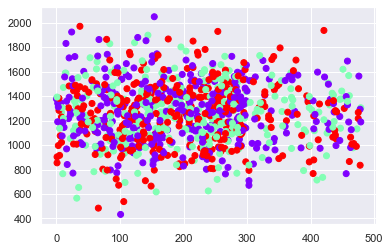

In [10]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['months_as_customer'],data_with_clusters['policy_annual_premium'],c=data_with_clusters['Clusters'],cmap='rainbow')

C:\Users\AN2025~1\AppData\Local\Temp/ipykernel_22784/1669593034.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


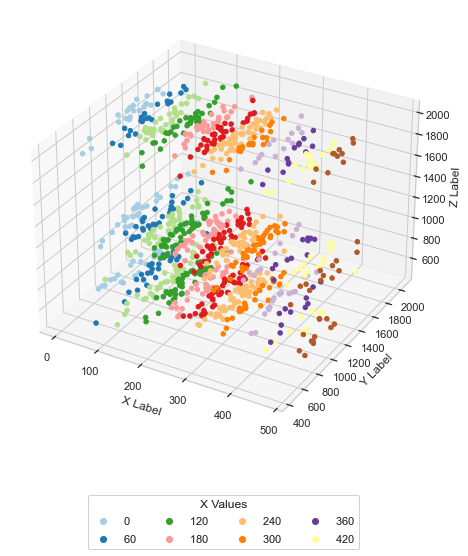

In [23]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

g = ax.scatter(data_with_clusters['months_as_customer'],data_with_clusters['policy_annual_premium'],data_with_clusters['policy_deductable'], c=data_with_clusters['months_as_customer'], marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="X Values", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()

# Hyperparameter

C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a m

Text(0, 0.5, 'WCSS')

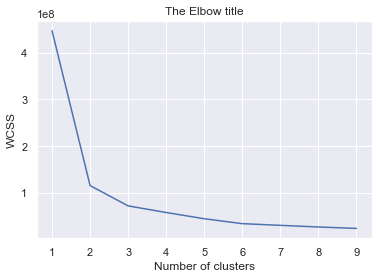

In [14]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [24]:
kmeans = KMeans(6)
kmeans.fit(x)

C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=6)

In [25]:
identified_clusters = kmeans.fit_predict(x)

C:\Users\AN20259618\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


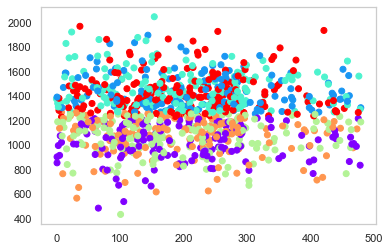

In [26]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['months_as_customer'],data_with_clusters['policy_annual_premium'],c=data_with_clusters['Clusters'],cmap='rainbow')

C:\Users\AN2025~1\AppData\Local\Temp/ipykernel_22784/1669593034.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


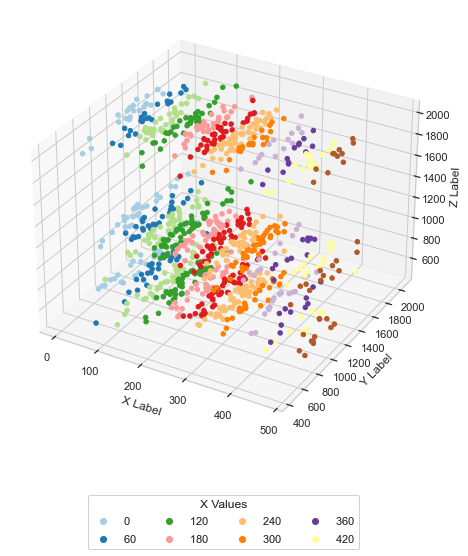

In [27]:
import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

g = ax.scatter(data_with_clusters['months_as_customer'],data_with_clusters['policy_annual_premium'],data_with_clusters['policy_deductable'], c=data_with_clusters['months_as_customer'], marker='o', depthshade=False, cmap='Paired')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# produce a legend with the unique colors from the scatter
legend = ax.legend(*g.legend_elements(), loc="lower center", title="X Values", borderaxespad=-10, ncol=4)
ax.add_artist(legend)

plt.show()